### Importing Libraries

In [4]:
import numpy as np
import requests
import time
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import HTML
import warnings

# Step1: Data scraping

### Scraping data from Kijiji

In [ ]:
base_url = "https://www.kijiji.ca"
page_url = base_url + "/b-apartments-condos/gta-greater-toronto-area/apartment/c37l1700272a29276001?keywordToAttribute=apartment"

In [104]:
ads_links = []
response = requests.get(page_url)
soup = BeautifulSoup(response.text, 'lxml')

In [107]:
#get links from ads list
ads_links = []
response = requests.get(page_url)
soup = BeautifulSoup(response.text, 'lxml')
ads = soup.find_all("div", attrs={"class": ["search-item showcase top-feature", "search-item showcase regular-ad", "search-item top-feature", "search-item regular-ad"]})
for ad in ads:
    ads_links.append(base_url + ad["data-vip-url"])
    
while soup.find_all("a", attrs={'title': 'Next'}):
    next = soup.find_all("a", attrs={"title": "Next"})
    for page in next:
        page_url = base_url + page['href']
    response = requests.get(page_url)
    soup = BeautifulSoup(response.text, 'lxml')
    ads = soup.find_all("div", attrs={"class": ["search-item showcase top-feature", "search-item showcase regular-ad", "search-item top-feature", "search-item regular-ad"]})
    for ad in ads:
        ads_links.append(base_url + ad["data-vip-url"])
    print("Links from " + page_url + " added successfully!")
    
print(len(ads_links))

Links from https://www.kijiji.ca/b-apartments-condos/gta-greater-toronto-area/apartment/page-12/c37l1700272a29276001?ad=offering added successfully!
Links from https://www.kijiji.ca/b-apartments-condos/gta-greater-toronto-area/apartment/page-13/c37l1700272a29276001?ad=offering added successfully!
Links from https://www.kijiji.ca/b-apartments-condos/gta-greater-toronto-area/apartment/page-14/c37l1700272a29276001?ad=offering added successfully!
Links from https://www.kijiji.ca/b-apartments-condos/gta-greater-toronto-area/apartment/page-15/c37l1700272a29276001?ad=offering added successfully!
Links from https://www.kijiji.ca/b-apartments-condos/gta-greater-toronto-area/apartment/page-16/c37l1700272a29276001?ad=offering added successfully!
Links from https://www.kijiji.ca/b-apartments-condos/gta-greater-toronto-area/apartment/page-17/c37l1700272a29276001?ad=offering added successfully!
Links from https://www.kijiji.ca/b-apartments-condos/gta-greater-toronto-area/apartment/page-18/c37l170027

In [6]:
ads_links[:15]

['https://www.kijiji.ca/v-apartments-condos/city-of-toronto/2-bedroom-for-rent-yonge-and-eglinton/1654315735',
 'https://www.kijiji.ca/v-apartments-condos/city-of-toronto/renovated-3-bdm-apt-for-rent-in-torontos-danforth-village/1630118944',
 'https://www.kijiji.ca/v-apartments-condos/city-of-toronto/2-bedroom-apartments-in-the-heart-of-yonge-and-lawrene/1640614569',
 'https://www.kijiji.ca/v-condo-for-sale/city-of-toronto/toronto-living-2-bdrm-2-bth-bathurst-front/1654773317',
 'https://www.kijiji.ca/v-condo-for-sale/city-of-toronto/sun-filled-1-bedroom-den-penthouse-condo-with-9-ft-ceilings/1654773287',
 'https://www.kijiji.ca/v-apartments-condos/city-of-toronto/parkdale-bachelor-apartment-for-rent-140-146-jameson-avenue/1647844757',
 'https://www.kijiji.ca/v-apartments-condos/city-of-toronto/parkdale-1-bedroom-apartment-for-rent-140-146-jameson-avenue/1643705661',
 'https://www.kijiji.ca/v-apartments-condos/city-of-toronto/parkdale-1-bedroom-apartment-for-rent-24-tyndall-avenue/1505

In [7]:
links_df = pd.DataFrame (ads_links, columns = ['link'])


In [8]:
links_df[:10]

,link
0,https://www.kijiji.ca/v-apartments-condos/city...
1,https://www.kijiji.ca/v-apartments-condos/city...
2,https://www.kijiji.ca/v-apartments-condos/city...
3,https://www.kijiji.ca/v-condo-for-sale/city-of...
4,https://www.kijiji.ca/v-condo-for-sale/city-of...
5,https://www.kijiji.ca/v-apartments-condos/city...
6,https://www.kijiji.ca/v-apartments-condos/city...
7,https://www.kijiji.ca/v-apartments-condos/city...
8,https://www.kijiji.ca/v-apartments-condos/city...
9,https://www.kijiji.ca/v-condo-for-sale/city-of...


#### Extracting data from the webpage of kijiji

In [16]:
import pandas as pd
from bs4 import BeautifulSoup
import re
from time import sleep
from random import randint

def classInJs(name):
    return re.compile(name + ".*")


def get_value(string):
    if len(string) > 0:
        strings = string.split(":")
        if len(strings) >= 2:
            return strings[1].strip()
    return ""


def flatten_dict_(pyobj, keystring=''):
    if type(pyobj) == dict:
        keystring = keystring + '_' if keystring else keystring
        for k in pyobj:
            yield from flatten_dict_(pyobj[k], keystring + str(k))
    else:
        yield keystring, pyobj


def flatten_dict(dict):
    return {k: v for k, v in flatten_dict_(dict)}


def extract_price(soup):
    price = ""

    for element in soup.find_all(class_=[classInJs("priceWrapper")]):
        span = element.find("span")
        price = span.get("content")
    return price


def extract_title(soup):
    title = ""
    for element in soup.find_all("h1", class_=[classInJs("title")]):
        title = element.text.strip()
    return title


def extract_address(soup):
    address = ""
    for element in soup.find_all(class_=[classInJs("address")]):
        address = element.text.strip()
    return address


def extract_type(soup):
    type = ""
    elements = soup.find_all(class_=[classInJs("noLabelValue")])
    if len(elements) > 0:
        type = elements[0].text.strip()
    return type


def extract_rooms(soup):
    room = ""
    elements = soup.find_all(class_=[classInJs("noLabelValue")])
    if len(elements) > 1:
        room = get_value(elements[1].text.strip())
    return room


def extract_bathroom(soup):
    bathroom = ""
    elements = soup.find_all(class_=[classInJs("noLabelValue")])
    if len(elements) > 2:
        bathroom = get_value(elements[2].text.strip())
    return bathroom


def extract_services(soup):
    services = {}
    for element in soup.find_all("h4", string=["Services inclus"]):
        for service_list in element.next_siblings:
            for item in service_list.find_all(class_=[classInJs("groupItem")]):
                service = item.find("svg").get("aria-label")
                if len(service) > 0:
                    service = service.split(":")
                    services[service[1].strip()] = service[0] == "Oui" or service[0] == "Yes"
                break
            break
        break
    return services


def extract_parking_spots(soup):
    parking_spots = 0
    for element in soup.find_all("dt", string=["Stationnement inclus"]):
        for sibling in element.next_siblings:
            parking_spots = sibling.text.strip()
            break
        break
    return parking_spots


def extract_utilities(soup):
    utilities = []
    for element in soup.find_all("h4", string=["Utilities Included"]):
        for service_list in element.next_siblings:
            for item in service_list.find_all(class_=[classInJs("groupItem")]):
                utilities.append(item.text.strip())
    return ", ".join(utilities)


def extract_furnished(soup):
    furnished = False
    for element in soup.find_all("dt", string=["Meublé"]):
        for sibling in element.next_siblings:
            furnished = sibling.text.strip()
            furnished = furnished == "Oui" or furnished == "Yes"
            break
        break
    return furnished


def extract_size(soup):
    size = ""
    for element in soup.find_all("dt", string=["Taille (pieds carrés)"]):
        for sibling in element.next_siblings:
            size = sibling.text.strip()
            break
        break
    return size


def extract_air_conditioner(soup):
    air_conditioned = False
    for element in soup.find_all("dt", string=["Air Conditioning"]):
        for sibling in element.next_siblings:
            air_conditioned = sibling.text.strip()
            air_conditioned = air_conditioned == "Oui" or air_conditioned == "Yes"
            break
        break
    return air_conditioned


def extract_allow_pets(soup):
    allow_pets = ""
    for element in soup.find_all("dt", string=["Pet Friendly"]):
        for sibling in element.next_siblings:
            allow_pets = sibling.text.strip()
            break
        break
    return allow_pets

def fetch_ad(link):
    ad = {}
    page = requests.get(link)
    soup = BeautifulSoup(page.text, 'html.parser')
    ad["link"] = link
    ad["price"] = extract_price(soup)
    ad["title"] = extract_title(soup)
    ad["address"] = extract_address(soup)
    ad["type"] = extract_type(soup)
    ad["rooms"] = extract_rooms(soup)
    ad["bathroom"] = extract_bathroom(soup)
    ad["services"] = extract_services(soup)
    ad["parking_spots"] = extract_parking_spots(soup)
    ad["utilities"] = extract_utilities(soup)
    ad["furnished"] = extract_furnished(soup)
    ad["size"] = extract_size(soup)
    ad["air_conditioned"] = extract_air_conditioner(soup)
    ad["allow_pets"] = extract_allow_pets(soup)
    return flatten_dict(ad)

#### Testing the functions

In [18]:
fetch_ad(links_df['link'][0])

{'link': 'https://www.kijiji.ca/v-apartments-condos/city-of-toronto/2-bedroom-for-rent-yonge-and-eglinton/1654315735',
 'price': '2900.',
 'title': '2 Bedroom for Rent - Yonge and eglinton',
 'address': 'Toronto, ON M5P 1G9',
 'type': 'Apartment',
 'rooms': '2',
 'bathroom': '1',
 'parking_spots': 0,
 'utilities': '',
 'furnished': False,
 'size': '',
 'air_conditioned': True,
 'allow_pets': 'Yes'}

#### Fetching the data and converting it into a dataframe

In [ ]:
def fetch_ads(df):
    links = df["link"].unique()
    ads = []
    for i, link in enumerate(links):
        ads.append(fetch_ad(link))
        #print(f'{i+1}/{len(links)}')
        #sleep(randint(2, 5))
    return pd.DataFrame(ads)

In [ ]:
ads = fetch_ads(links_df)

#### Saving the data as a CSV file

In [ ]:
ads.to_csv('ads.csv', index=False)

In [30]:
# Reading data from CSV file
df = pd.read_csv("ads.csv")

In [31]:
df.nunique()

link               2253
price               123
title               239
address             205
type                  1
rooms                 9
bathroom              3
parking_spots         1
utilities             1
furnished             1
size                  0
air_conditioned       2
allow_pets            3
dtype: int64

In [32]:
df.head(10)

,link,price,title,address,type,rooms,bathroom,parking_spots,utilities,furnished,size,air_conditioned,allow_pets
0,https://www.kijiji.ca/v-apartments-condos/city...,3023.0,Brand New 3-Bedroom in North York! York Mills...,"1225 York Road, Toronto, ON, M3A 1Y4",Apartment,3,2.0,0,NaN,False,NaN,True,Yes
1,https://www.kijiji.ca/v-apartments-condos/city...,3016.0,Brand New 3-Bdrm. + Den in North York! York M...,"1225 York Road, Toronto, ON, M3A 1Y4",Apartment,3 + Den,2.0,0,NaN,False,NaN,True,Yes
2,https://www.kijiji.ca/v-apartments-condos/city...,2199.0,Executive Furnished 1 Bedroom Suites on Avenue...,"320-346 Avenue Road, Toronto, ON, M4V 2H3",Apartment,1,1.0,0,"Hydro, Heat, Water",False,NaN,True,Yes
3,https://www.kijiji.ca/v-apartments-condos/city...,2295.0,Renovated Jr. 1 @ Yonge and Davisville,"155 Balliol Street, Toronto, ON, M4S 1C2",Apartment,1,1.0,0,"Hydro, Heat, Water",False,NaN,True,Yes
4,https://www.kijiji.ca/v-apartments-condos/oakv...,2749.0,3 Bedroom Townhome Apartment for Rent - 452-56...,"560 Arlington Boulevard, Burlington, ON, L7N 2S4",Apartment,3,1.5,0,NaN,False,NaN,False,Yes
5,https://www.kijiji.ca/v-apartments-condos/miss...,2683.0,2 Bedroom Suite For Rent,"1980 Fowler Drive, Mississauga, ON, L5B 1B6",Apartment,2,1.0,0,"Hydro, Heat, Water",False,NaN,False,Yes
6,https://www.kijiji.ca/v-apartments-condos/miss...,2274.0,1 Bedroom Suite for Rent,"1980 Fowler Drive, Mississauga, ON, L5B 1B6",Apartment,1,1.0,0,"Hydro, Heat, Water",False,NaN,False,Yes
7,https://www.kijiji.ca/v-apartments-condos/miss...,2723.0,2 Bedroom Suite for Rent,"1970 Fowler Drive, Mississauga, ON, L5K 1B5",Apartment,2,1.0,0,"Hydro, Heat, Water",False,NaN,False,Yes
8,https://www.kijiji.ca/v-apartments-condos/miss...,2274.0,1 Bedroom Suite For Rent,"1970 Fowler Drive, Mississauga, ON, L5K 1B5",Apartment,1,1.0,0,NaN,False,NaN,False,Yes
9,https://www.kijiji.ca/v-apartments-condos/city...,2350.0,2 Bedroom Apartments for Rent in Toronto,"3890 - 3896 Bathurst Street, Toronto, ON, M3H 3N5",Apartment,2,1.0,0,"Hydro, Heat, Water",False,NaN,False,Yes


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   link             2253 non-null   object 
 1   price            217 non-null    float64
 2   title            240 non-null    object 
 3   address          240 non-null    object 
 4   type             240 non-null    object 
 5   rooms            240 non-null    object 
 6   bathroom         240 non-null    float64
 7   parking_spots    2253 non-null   int64  
 8   utilities        155 non-null    object 
 9   furnished        2253 non-null   bool   
 10  size             0 non-null      float64
 11  air_conditioned  2253 non-null   bool   
 12  allow_pets       240 non-null    object 
dtypes: bool(2), float64(3), int64(1), object(7)
memory usage: 198.1+ KB


In [34]:
df.describe()

,price,bathroom,parking_spots,size
count,217.000000,240.000000,2253.0,0.0
mean,2284.608295,1.133333,0.0,NaN
std,561.982469,0.321694,0.0,NaN
min,450.000000,1.000000,0.0,NaN
25%,1925.000000,1.000000,0.0,NaN
50%,2300.000000,1.000000,0.0,NaN
75%,2650.000000,1.000000,0.0,NaN
max,3995.000000,2.000000,0.0,NaN


# Step2: Data Wrangling

#### Handling Duplicates

In [35]:
#96 rows duplicates, let's keep only the first
df = df.drop_duplicates(keep='first')

In [36]:
df.shape

(2253, 13)

#### Handing Null Values

In [37]:
df.isna().sum()

link                  0
price              2036
title              2013
address            2013
type               2013
rooms              2013
bathroom           2013
parking_spots         0
utilities          2098
furnished             0
size               2253
air_conditioned       0
allow_pets         2013
dtype: int64

In [38]:
df = df.replace('', np.nan)
df.head(10)

,link,price,title,address,type,rooms,bathroom,parking_spots,utilities,furnished,size,air_conditioned,allow_pets
0,https://www.kijiji.ca/v-apartments-condos/city...,3023.0,Brand New 3-Bedroom in North York! York Mills...,"1225 York Road, Toronto, ON, M3A 1Y4",Apartment,3,2.0,0,NaN,False,NaN,True,Yes
1,https://www.kijiji.ca/v-apartments-condos/city...,3016.0,Brand New 3-Bdrm. + Den in North York! York M...,"1225 York Road, Toronto, ON, M3A 1Y4",Apartment,3 + Den,2.0,0,NaN,False,NaN,True,Yes
2,https://www.kijiji.ca/v-apartments-condos/city...,2199.0,Executive Furnished 1 Bedroom Suites on Avenue...,"320-346 Avenue Road, Toronto, ON, M4V 2H3",Apartment,1,1.0,0,"Hydro, Heat, Water",False,NaN,True,Yes
3,https://www.kijiji.ca/v-apartments-condos/city...,2295.0,Renovated Jr. 1 @ Yonge and Davisville,"155 Balliol Street, Toronto, ON, M4S 1C2",Apartment,1,1.0,0,"Hydro, Heat, Water",False,NaN,True,Yes
4,https://www.kijiji.ca/v-apartments-condos/oakv...,2749.0,3 Bedroom Townhome Apartment for Rent - 452-56...,"560 Arlington Boulevard, Burlington, ON, L7N 2S4",Apartment,3,1.5,0,NaN,False,NaN,False,Yes
5,https://www.kijiji.ca/v-apartments-condos/miss...,2683.0,2 Bedroom Suite For Rent,"1980 Fowler Drive, Mississauga, ON, L5B 1B6",Apartment,2,1.0,0,"Hydro, Heat, Water",False,NaN,False,Yes
6,https://www.kijiji.ca/v-apartments-condos/miss...,2274.0,1 Bedroom Suite for Rent,"1980 Fowler Drive, Mississauga, ON, L5B 1B6",Apartment,1,1.0,0,"Hydro, Heat, Water",False,NaN,False,Yes
7,https://www.kijiji.ca/v-apartments-condos/miss...,2723.0,2 Bedroom Suite for Rent,"1970 Fowler Drive, Mississauga, ON, L5K 1B5",Apartment,2,1.0,0,"Hydro, Heat, Water",False,NaN,False,Yes
8,https://www.kijiji.ca/v-apartments-condos/miss...,2274.0,1 Bedroom Suite For Rent,"1970 Fowler Drive, Mississauga, ON, L5K 1B5",Apartment,1,1.0,0,NaN,False,NaN,False,Yes
9,https://www.kijiji.ca/v-apartments-condos/city...,2350.0,2 Bedroom Apartments for Rent in Toronto,"3890 - 3896 Bathurst Street, Toronto, ON, M3H 3N5",Apartment,2,1.0,0,"Hydro, Heat, Water",False,NaN,False,Yes


In [39]:
df.isna().sum()

link                  0
price              2036
title              2013
address            2013
type               2013
rooms              2013
bathroom           2013
parking_spots         0
utilities          2098
furnished             0
size               2253
air_conditioned       0
allow_pets         2013
dtype: int64

In [40]:
df

,link,price,title,address,type,rooms,bathroom,parking_spots,utilities,furnished,size,air_conditioned,allow_pets
0,https://www.kijiji.ca/v-apartments-condos/city...,3023.0,Brand New 3-Bedroom in North York! York Mills...,"1225 York Road, Toronto, ON, M3A 1Y4",Apartment,3,2.0,0,NaN,False,NaN,True,Yes
1,https://www.kijiji.ca/v-apartments-condos/city...,3016.0,Brand New 3-Bdrm. + Den in North York! York M...,"1225 York Road, Toronto, ON, M3A 1Y4",Apartment,3 + Den,2.0,0,NaN,False,NaN,True,Yes
2,https://www.kijiji.ca/v-apartments-condos/city...,2199.0,Executive Furnished 1 Bedroom Suites on Avenue...,"320-346 Avenue Road, Toronto, ON, M4V 2H3",Apartment,1,1.0,0,"Hydro, Heat, Water",False,NaN,True,Yes
3,https://www.kijiji.ca/v-apartments-condos/city...,2295.0,Renovated Jr. 1 @ Yonge and Davisville,"155 Balliol Street, Toronto, ON, M4S 1C2",Apartment,1,1.0,0,"Hydro, Heat, Water",False,NaN,True,Yes
4,https://www.kijiji.ca/v-apartments-condos/oakv...,2749.0,3 Bedroom Townhome Apartment for Rent - 452-56...,"560 Arlington Boulevard, Burlington, ON, L7N 2S4",Apartment,3,1.5,0,NaN,False,NaN,False,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,https://www.kijiji.ca/v-apartments-condos/city...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,False,NaN,False,NaN
2249,https://www.kijiji.ca/v-apartments-condos/miss...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,False,NaN,False,NaN
2250,https://www.kijiji.ca/v-apartments-condos/city...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,False,NaN,False,NaN
2251,https://www.kijiji.ca/v-apartments-condos/city...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,False,NaN,False,NaN


In [41]:
df.shape

(2253, 13)

In [42]:
#checking missing values
df.isna().sum()

link                  0
price              2036
title              2013
address            2013
type               2013
rooms              2013
bathroom           2013
parking_spots         0
utilities          2098
furnished             0
size               2253
air_conditioned       0
allow_pets         2013
dtype: int64

In [43]:
df.nunique()

link               2253
price               123
title               239
address             205
type                  1
rooms                 9
bathroom              3
parking_spots         1
utilities             1
furnished             1
size                  0
air_conditioned       2
allow_pets            3
dtype: int64

In [44]:
#Dropping size column as there are many null values
df = df.drop('size', axis=1)

In [45]:
df[:20]


,link,price,title,address,type,rooms,bathroom,parking_spots,utilities,furnished,air_conditioned,allow_pets
0,https://www.kijiji.ca/v-apartments-condos/city...,3023.0,Brand New 3-Bedroom in North York! York Mills...,"1225 York Road, Toronto, ON, M3A 1Y4",Apartment,3,2.0,0,NaN,False,True,Yes
1,https://www.kijiji.ca/v-apartments-condos/city...,3016.0,Brand New 3-Bdrm. + Den in North York! York M...,"1225 York Road, Toronto, ON, M3A 1Y4",Apartment,3 + Den,2.0,0,NaN,False,True,Yes
2,https://www.kijiji.ca/v-apartments-condos/city...,2199.0,Executive Furnished 1 Bedroom Suites on Avenue...,"320-346 Avenue Road, Toronto, ON, M4V 2H3",Apartment,1,1.0,0,"Hydro, Heat, Water",False,True,Yes
3,https://www.kijiji.ca/v-apartments-condos/city...,2295.0,Renovated Jr. 1 @ Yonge and Davisville,"155 Balliol Street, Toronto, ON, M4S 1C2",Apartment,1,1.0,0,"Hydro, Heat, Water",False,True,Yes
4,https://www.kijiji.ca/v-apartments-condos/oakv...,2749.0,3 Bedroom Townhome Apartment for Rent - 452-56...,"560 Arlington Boulevard, Burlington, ON, L7N 2S4",Apartment,3,1.5,0,NaN,False,False,Yes
5,https://www.kijiji.ca/v-apartments-condos/miss...,2683.0,2 Bedroom Suite For Rent,"1980 Fowler Drive, Mississauga, ON, L5B 1B6",Apartment,2,1.0,0,"Hydro, Heat, Water",False,False,Yes
6,https://www.kijiji.ca/v-apartments-condos/miss...,2274.0,1 Bedroom Suite for Rent,"1980 Fowler Drive, Mississauga, ON, L5B 1B6",Apartment,1,1.0,0,"Hydro, Heat, Water",False,False,Yes
7,https://www.kijiji.ca/v-apartments-condos/miss...,2723.0,2 Bedroom Suite for Rent,"1970 Fowler Drive, Mississauga, ON, L5K 1B5",Apartment,2,1.0,0,"Hydro, Heat, Water",False,False,Yes
8,https://www.kijiji.ca/v-apartments-condos/miss...,2274.0,1 Bedroom Suite For Rent,"1970 Fowler Drive, Mississauga, ON, L5K 1B5",Apartment,1,1.0,0,NaN,False,False,Yes
9,https://www.kijiji.ca/v-apartments-condos/city...,2350.0,2 Bedroom Apartments for Rent in Toronto,"3890 - 3896 Bathurst Street, Toronto, ON, M3H 3N5",Apartment,2,1.0,0,"Hydro, Heat, Water",False,False,Yes


In [46]:
df['utilities'] = df['utilities'].fillna('No Utilities')

In [47]:
df.isna().sum()


link                  0
price              2036
title              2013
address            2013
type               2013
rooms              2013
bathroom           2013
parking_spots         0
utilities             0
furnished             0
air_conditioned       0
allow_pets         2013
dtype: int64

In [48]:
#our data is free from the nan now


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2253 entries, 0 to 2252
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   link             2253 non-null   object 
 1   price            217 non-null    float64
 2   title            240 non-null    object 
 3   address          240 non-null    object 
 4   type             240 non-null    object 
 5   rooms            240 non-null    object 
 6   bathroom         240 non-null    float64
 7   parking_spots    2253 non-null   int64  
 8   utilities        2253 non-null   object 
 9   furnished        2253 non-null   bool   
 10  air_conditioned  2253 non-null   bool   
 11  allow_pets       240 non-null    object 
dtypes: bool(2), float64(2), int64(1), object(7)
memory usage: 198.0+ KB


In [50]:
df.head(10)

,link,price,title,address,type,rooms,bathroom,parking_spots,utilities,furnished,air_conditioned,allow_pets
0,https://www.kijiji.ca/v-apartments-condos/city...,3023.0,Brand New 3-Bedroom in North York! York Mills...,"1225 York Road, Toronto, ON, M3A 1Y4",Apartment,3,2.0,0,No Utilities,False,True,Yes
1,https://www.kijiji.ca/v-apartments-condos/city...,3016.0,Brand New 3-Bdrm. + Den in North York! York M...,"1225 York Road, Toronto, ON, M3A 1Y4",Apartment,3 + Den,2.0,0,No Utilities,False,True,Yes
2,https://www.kijiji.ca/v-apartments-condos/city...,2199.0,Executive Furnished 1 Bedroom Suites on Avenue...,"320-346 Avenue Road, Toronto, ON, M4V 2H3",Apartment,1,1.0,0,"Hydro, Heat, Water",False,True,Yes
3,https://www.kijiji.ca/v-apartments-condos/city...,2295.0,Renovated Jr. 1 @ Yonge and Davisville,"155 Balliol Street, Toronto, ON, M4S 1C2",Apartment,1,1.0,0,"Hydro, Heat, Water",False,True,Yes
4,https://www.kijiji.ca/v-apartments-condos/oakv...,2749.0,3 Bedroom Townhome Apartment for Rent - 452-56...,"560 Arlington Boulevard, Burlington, ON, L7N 2S4",Apartment,3,1.5,0,No Utilities,False,False,Yes
5,https://www.kijiji.ca/v-apartments-condos/miss...,2683.0,2 Bedroom Suite For Rent,"1980 Fowler Drive, Mississauga, ON, L5B 1B6",Apartment,2,1.0,0,"Hydro, Heat, Water",False,False,Yes
6,https://www.kijiji.ca/v-apartments-condos/miss...,2274.0,1 Bedroom Suite for Rent,"1980 Fowler Drive, Mississauga, ON, L5B 1B6",Apartment,1,1.0,0,"Hydro, Heat, Water",False,False,Yes
7,https://www.kijiji.ca/v-apartments-condos/miss...,2723.0,2 Bedroom Suite for Rent,"1970 Fowler Drive, Mississauga, ON, L5K 1B5",Apartment,2,1.0,0,"Hydro, Heat, Water",False,False,Yes
8,https://www.kijiji.ca/v-apartments-condos/miss...,2274.0,1 Bedroom Suite For Rent,"1970 Fowler Drive, Mississauga, ON, L5K 1B5",Apartment,1,1.0,0,No Utilities,False,False,Yes
9,https://www.kijiji.ca/v-apartments-condos/city...,2350.0,2 Bedroom Apartments for Rent in Toronto,"3890 - 3896 Bathurst Street, Toronto, ON, M3H 3N5",Apartment,2,1.0,0,"Hydro, Heat, Water",False,False,Yes


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2253 entries, 0 to 2252
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   link             2253 non-null   object 
 1   price            217 non-null    float64
 2   title            240 non-null    object 
 3   address          240 non-null    object 
 4   type             240 non-null    object 
 5   rooms            240 non-null    object 
 6   bathroom         240 non-null    float64
 7   parking_spots    2253 non-null   int64  
 8   utilities        2253 non-null   object 
 9   furnished        2253 non-null   bool   
 10  air_conditioned  2253 non-null   bool   
 11  allow_pets       240 non-null    object 
dtypes: bool(2), float64(2), int64(1), object(7)
memory usage: 198.0+ KB


In [52]:
df.nunique()

link               2253
price               123
title               239
address             205
type                  1
rooms                 9
bathroom              3
parking_spots         1
utilities             2
furnished             1
air_conditioned       2
allow_pets            3
dtype: int64

In [53]:
df['address'].duplicated()

0       False
1        True
2       False
3       False
4       False
        ...  
2248     True
2249     True
2250     True
2251     True
2252     True
Name: address, Length: 2253, dtype: bool

In [54]:
df

,link,price,title,address,type,rooms,bathroom,parking_spots,utilities,furnished,air_conditioned,allow_pets
0,https://www.kijiji.ca/v-apartments-condos/city...,3023.0,Brand New 3-Bedroom in North York! York Mills...,"1225 York Road, Toronto, ON, M3A 1Y4",Apartment,3,2.0,0,No Utilities,False,True,Yes
1,https://www.kijiji.ca/v-apartments-condos/city...,3016.0,Brand New 3-Bdrm. + Den in North York! York M...,"1225 York Road, Toronto, ON, M3A 1Y4",Apartment,3 + Den,2.0,0,No Utilities,False,True,Yes
2,https://www.kijiji.ca/v-apartments-condos/city...,2199.0,Executive Furnished 1 Bedroom Suites on Avenue...,"320-346 Avenue Road, Toronto, ON, M4V 2H3",Apartment,1,1.0,0,"Hydro, Heat, Water",False,True,Yes
3,https://www.kijiji.ca/v-apartments-condos/city...,2295.0,Renovated Jr. 1 @ Yonge and Davisville,"155 Balliol Street, Toronto, ON, M4S 1C2",Apartment,1,1.0,0,"Hydro, Heat, Water",False,True,Yes
4,https://www.kijiji.ca/v-apartments-condos/oakv...,2749.0,3 Bedroom Townhome Apartment for Rent - 452-56...,"560 Arlington Boulevard, Burlington, ON, L7N 2S4",Apartment,3,1.5,0,No Utilities,False,False,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
2248,https://www.kijiji.ca/v-apartments-condos/city...,NaN,NaN,NaN,NaN,NaN,NaN,0,No Utilities,False,False,NaN
2249,https://www.kijiji.ca/v-apartments-condos/miss...,NaN,NaN,NaN,NaN,NaN,NaN,0,No Utilities,False,False,NaN
2250,https://www.kijiji.ca/v-apartments-condos/city...,NaN,NaN,NaN,NaN,NaN,NaN,0,No Utilities,False,False,NaN
2251,https://www.kijiji.ca/v-apartments-condos/city...,NaN,NaN,NaN,NaN,NaN,NaN,0,No Utilities,False,False,NaN


In [55]:
#looking for outliers at price
price_count = df['price'].value_counts()
price_count.sort_index().head(10)
     

450.0     1
500.0     2
700.0     1
1100.0    1
1180.0    1
1250.0    1
1295.0    1
1345.0    1
1395.0    1
1425.0    1
Name: price, dtype: int64

In [56]:
price_count.sort_index(ascending=False).head(10)


3995.0    1
3500.0    3
3429.0    1
3390.0    1
3300.0    3
3295.0    1
3266.0    1
3200.0    2
3027.0    1
3023.0    1
Name: price, dtype: int64

In [57]:
df['price'].describe()

count     217.000000
mean     2284.608295
std       561.982469
min       450.000000
25%      1925.000000
50%      2300.000000
75%      2650.000000
max      3995.000000
Name: price, dtype: float64

# Step 3: Plots

C:\Users\dafin\AppData\Local\Temp\ipykernel_14468\444587821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<AxesSubplot: xlabel='price', ylabel='Density'>

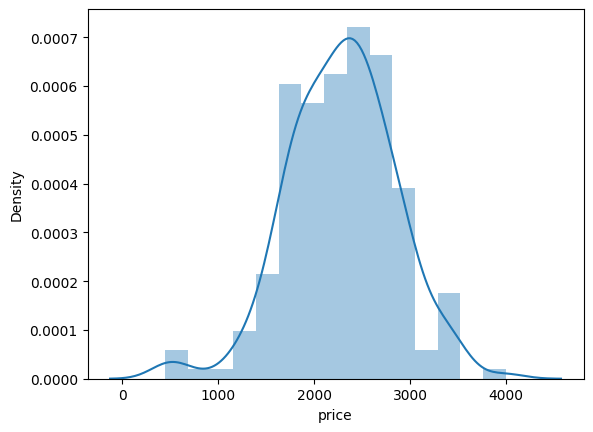

In [58]:
sns.distplot(df['price'])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '3'),
  Text(1, 0, '3 + Den'),
  Text(2, 0, '1'),
  Text(3, 0, '2'),
  Text(4, 0, 'Bachelor/Studio'),
  Text(5, 0, '1 + Den'),
  Text(6, 0, '2 + Den'),
  Text(7, 0, '5+'),
  Text(8, 0, '4')])

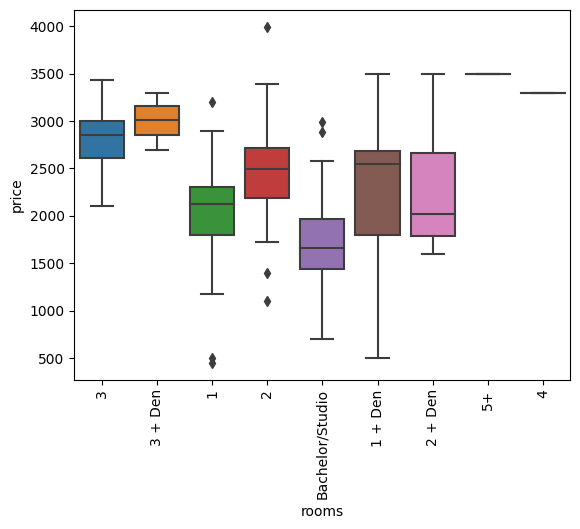

In [59]:
sns.boxplot(x="rooms", y='price', data=df)
plt.xticks(rotation=90)


In [60]:
by_rooms = df['rooms'].value_counts().sort_index()

Text(0, 0.5, 'Count')

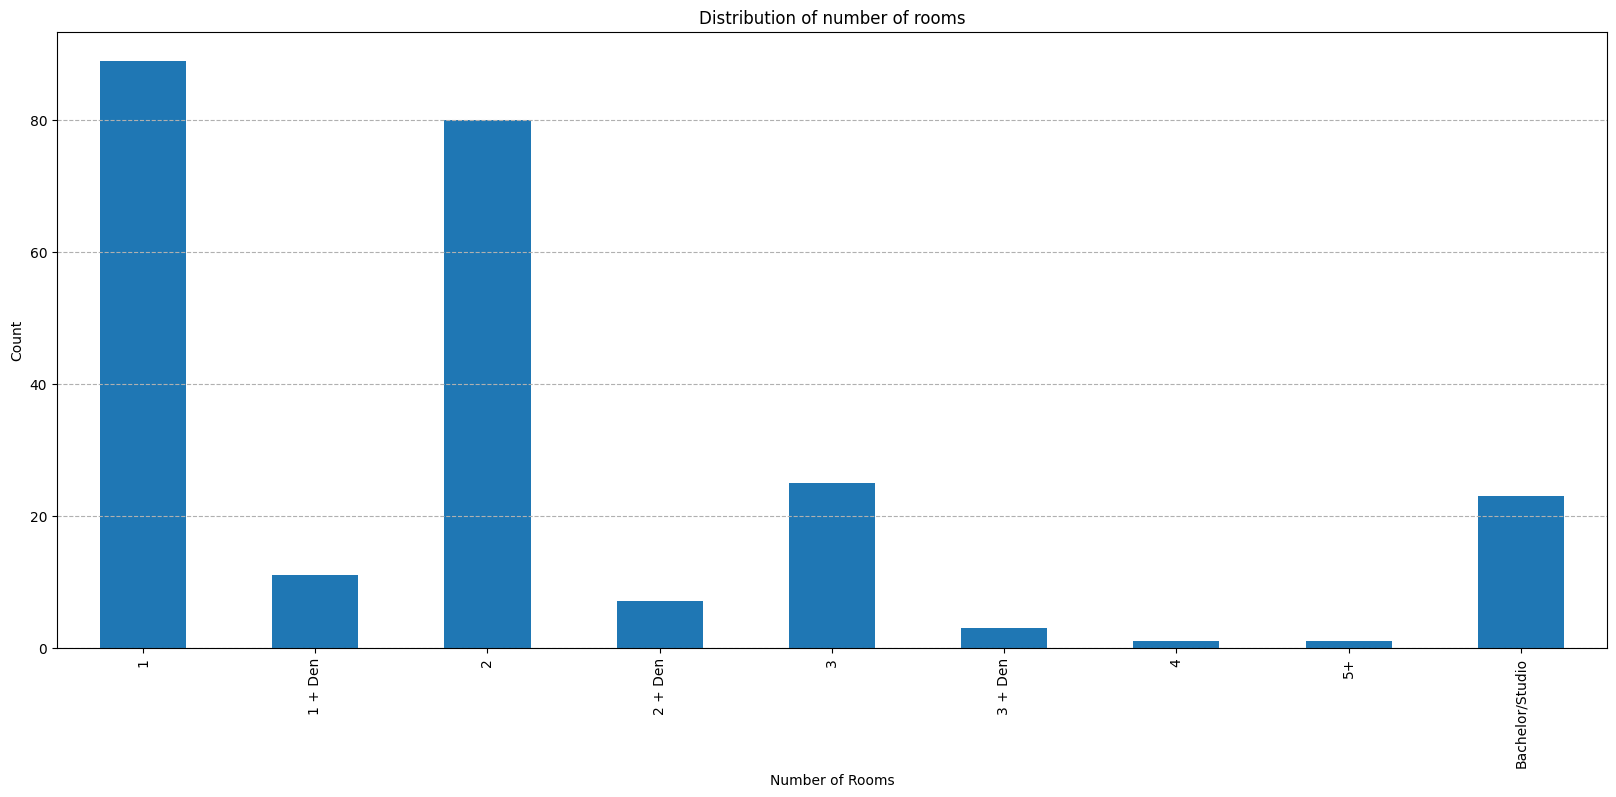

In [61]:
by_rooms.plot.bar(figsize=(20,8))
plt.grid(linestyle='--', axis='y')
plt.title("Distribution of number of rooms")
plt.xlabel("Number of Rooms")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

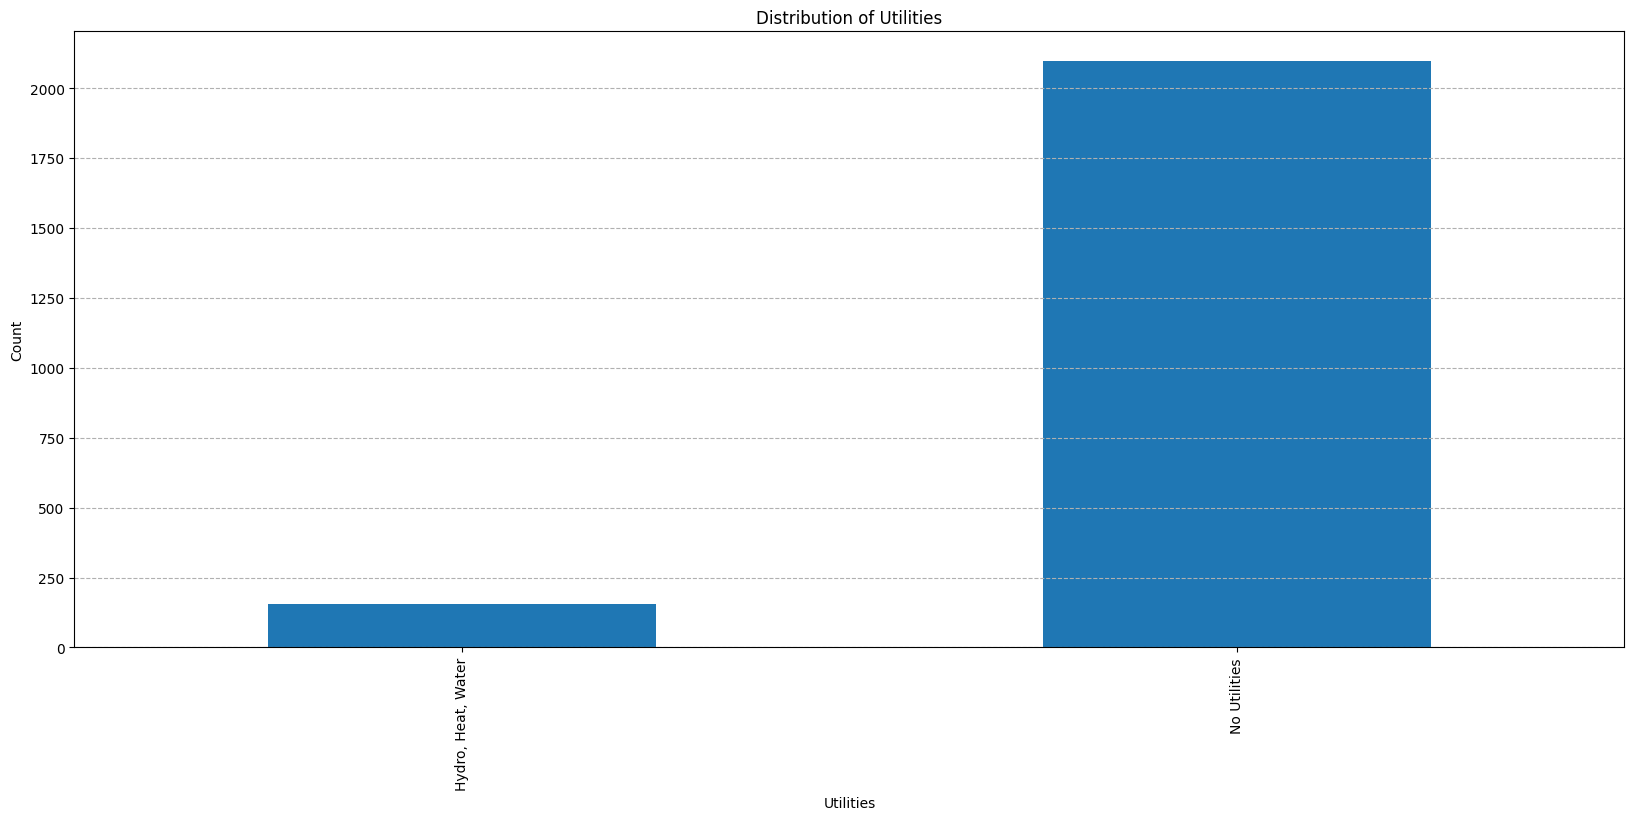

In [62]:
by_utilities = df['utilities'].value_counts().sort_index()
by_utilities.plot.bar(figsize=(20,8))
plt.grid(linestyle='--', axis='y')
plt.title("Distribution of Utilities")
plt.xlabel("Utilities")
plt.ylabel("Count")

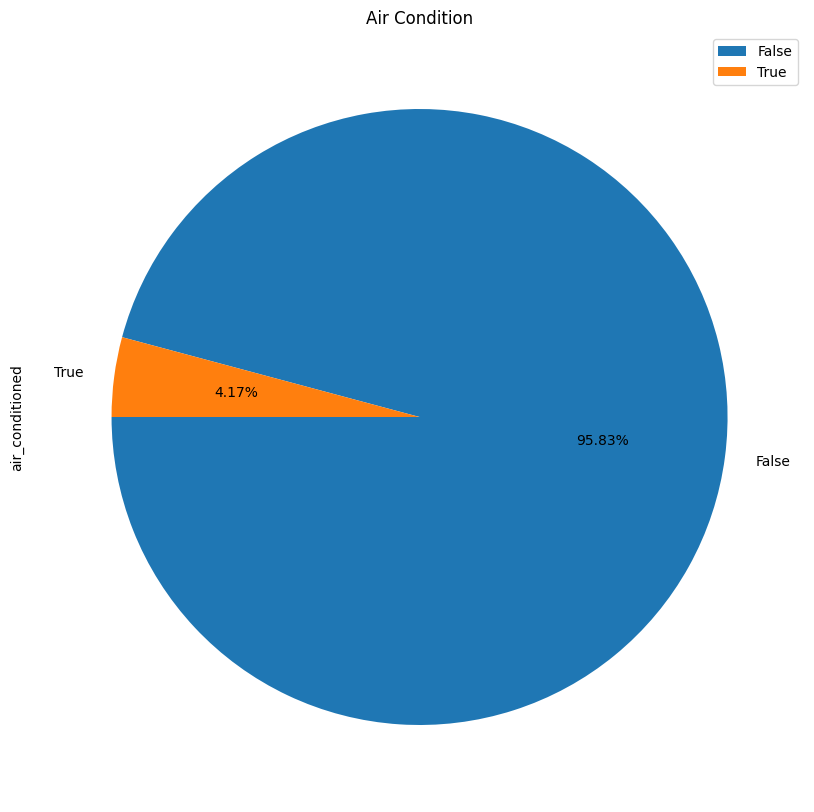

In [63]:
#ads per fuel
by_air_condition = df['air_conditioned'].value_counts()
by_air_condition.plot.pie(figsize=(20,10), autopct='%1.2f%%', startangle=180)
plt.title('Air Condition')
plt.legend()

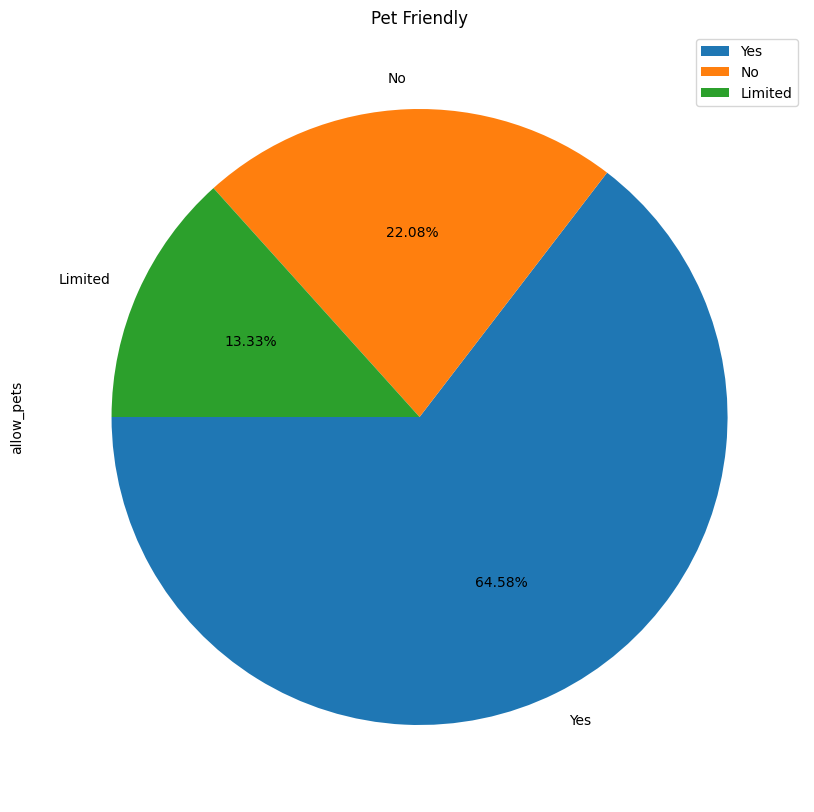

In [64]:
by_allow_pets = df['allow_pets'].value_counts()
by_allow_pets.plot.pie(figsize=(20,10), autopct='%1.2f%%', startangle=180)
plt.title('Pet Friendly')
plt.legend()

1.0    202
2.0     26
1.5     12
Name: bathroom, dtype: int64


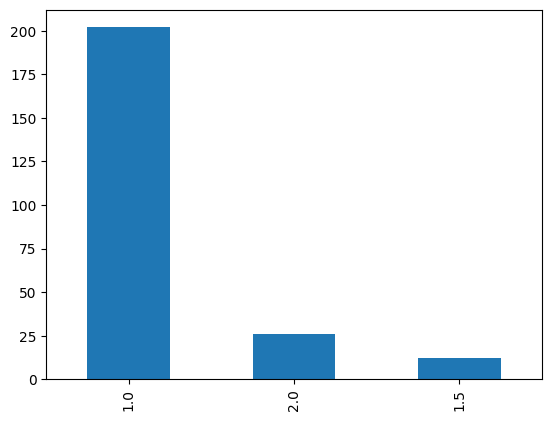

In [65]:
# count the frequency of each category
counts = df['bathroom'].value_counts()
print(counts)
# plot a bar chart of the counts
counts.plot(kind='bar')

# show the plot
plt.show()


In [66]:
#Converting categorical into numerical
mapping = {'Yes': 1, 'No': 0, 'Limited': 2}
df['allow_pets'] = df['allow_pets'].replace(mapping)

In [67]:
df

,link,price,title,address,type,rooms,bathroom,parking_spots,utilities,furnished,air_conditioned,allow_pets
0,https://www.kijiji.ca/v-apartments-condos/city...,3023.0,Brand New 3-Bedroom in North York! York Mills...,"1225 York Road, Toronto, ON, M3A 1Y4",Apartment,3,2.0,0,No Utilities,False,True,1.0
1,https://www.kijiji.ca/v-apartments-condos/city...,3016.0,Brand New 3-Bdrm. + Den in North York! York M...,"1225 York Road, Toronto, ON, M3A 1Y4",Apartment,3 + Den,2.0,0,No Utilities,False,True,1.0
2,https://www.kijiji.ca/v-apartments-condos/city...,2199.0,Executive Furnished 1 Bedroom Suites on Avenue...,"320-346 Avenue Road, Toronto, ON, M4V 2H3",Apartment,1,1.0,0,"Hydro, Heat, Water",False,True,1.0
3,https://www.kijiji.ca/v-apartments-condos/city...,2295.0,Renovated Jr. 1 @ Yonge and Davisville,"155 Balliol Street, Toronto, ON, M4S 1C2",Apartment,1,1.0,0,"Hydro, Heat, Water",False,True,1.0
4,https://www.kijiji.ca/v-apartments-condos/oakv...,2749.0,3 Bedroom Townhome Apartment for Rent - 452-56...,"560 Arlington Boulevard, Burlington, ON, L7N 2S4",Apartment,3,1.5,0,No Utilities,False,False,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2248,https://www.kijiji.ca/v-apartments-condos/city...,NaN,NaN,NaN,NaN,NaN,NaN,0,No Utilities,False,False,NaN
2249,https://www.kijiji.ca/v-apartments-condos/miss...,NaN,NaN,NaN,NaN,NaN,NaN,0,No Utilities,False,False,NaN
2250,https://www.kijiji.ca/v-apartments-condos/city...,NaN,NaN,NaN,NaN,NaN,NaN,0,No Utilities,False,False,NaN
2251,https://www.kijiji.ca/v-apartments-condos/city...,NaN,NaN,NaN,NaN,NaN,NaN,0,No Utilities,False,False,NaN


# step 4: Pandas profiling

In [68]:
pip install pandas_profiling

     -------------------------------------- 324.4/324.4 kB 2.0 MB/s eta 0:00:00
     -------------------------------------- 345.9/345.9 kB 2.7 MB/s eta 0:00:00
     -------------------------------------- 663.4/663.4 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 296.5/296.5 kB 2.6 MB/s eta 0:00:00
     -------------------------------------- 151.7/151.7 kB 2.3 MB/s eta 0:00:00
     -------------------------------------- 102.7/102.7 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 4.2/4.2 MB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 4.7/4.7 MB 2.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27092 sha256=6aaea20486f514c7f4648fc84920045d67ed7b503963cff60569fd057cb1542b
  Stored in directory: c:\users\dafin\appdata\local\pip\cache\wheels\dd\91\29\a79cecb328d01739e64017b6fb9a1ab

In [69]:
#pandas profiling
from pandas_profiling import ProfileReport

C:\Users\dafin\AppData\Local\Temp\ipykernel_14468\365224578.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [70]:
profile = ProfileReport(df, title='My Data Profile Report', explorative=True)

# Output the report to an HTML file
profile.to_file('my_data_profile.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [71]:
from sklearn.preprocessing import OrdinalEncoder


In [72]:
# Encoding

# Create an OrdinalEncoder object
encoder = OrdinalEncoder()

# Fit the encoder to the categorical column
encoder.fit(df['allow_pets'].values.reshape(-1, 1))

# Transform the categorical column into a numerical column
df['allow_pets'] = encoder.transform(df['allow_pets'].values.reshape(-1, 1))


In [73]:
df[:10]

,link,price,title,address,type,rooms,bathroom,parking_spots,utilities,furnished,air_conditioned,allow_pets
0,https://www.kijiji.ca/v-apartments-condos/city...,3023.0,Brand New 3-Bedroom in North York! York Mills...,"1225 York Road, Toronto, ON, M3A 1Y4",Apartment,3,2.0,0,No Utilities,False,True,1.0
1,https://www.kijiji.ca/v-apartments-condos/city...,3016.0,Brand New 3-Bdrm. + Den in North York! York M...,"1225 York Road, Toronto, ON, M3A 1Y4",Apartment,3 + Den,2.0,0,No Utilities,False,True,1.0
2,https://www.kijiji.ca/v-apartments-condos/city...,2199.0,Executive Furnished 1 Bedroom Suites on Avenue...,"320-346 Avenue Road, Toronto, ON, M4V 2H3",Apartment,1,1.0,0,"Hydro, Heat, Water",False,True,1.0
3,https://www.kijiji.ca/v-apartments-condos/city...,2295.0,Renovated Jr. 1 @ Yonge and Davisville,"155 Balliol Street, Toronto, ON, M4S 1C2",Apartment,1,1.0,0,"Hydro, Heat, Water",False,True,1.0
4,https://www.kijiji.ca/v-apartments-condos/oakv...,2749.0,3 Bedroom Townhome Apartment for Rent - 452-56...,"560 Arlington Boulevard, Burlington, ON, L7N 2S4",Apartment,3,1.5,0,No Utilities,False,False,1.0
5,https://www.kijiji.ca/v-apartments-condos/miss...,2683.0,2 Bedroom Suite For Rent,"1980 Fowler Drive, Mississauga, ON, L5B 1B6",Apartment,2,1.0,0,"Hydro, Heat, Water",False,False,1.0
6,https://www.kijiji.ca/v-apartments-condos/miss...,2274.0,1 Bedroom Suite for Rent,"1980 Fowler Drive, Mississauga, ON, L5B 1B6",Apartment,1,1.0,0,"Hydro, Heat, Water",False,False,1.0
7,https://www.kijiji.ca/v-apartments-condos/miss...,2723.0,2 Bedroom Suite for Rent,"1970 Fowler Drive, Mississauga, ON, L5K 1B5",Apartment,2,1.0,0,"Hydro, Heat, Water",False,False,1.0
8,https://www.kijiji.ca/v-apartments-condos/miss...,2274.0,1 Bedroom Suite For Rent,"1970 Fowler Drive, Mississauga, ON, L5K 1B5",Apartment,1,1.0,0,No Utilities,False,False,1.0
9,https://www.kijiji.ca/v-apartments-condos/city...,2350.0,2 Bedroom Apartments for Rent in Toronto,"3890 - 3896 Bathurst Street, Toronto, ON, M3H 3N5",Apartment,2,1.0,0,"Hydro, Heat, Water",False,False,1.0


In [74]:
# Create an OrdinalEncoder object
encoder = OrdinalEncoder()

# Fit the encoder to the categorical column
encoder.fit(df['rooms'].values.reshape(-1, 1))

# Transform the categorical column into a numerical column
df['rooms'] = encoder.transform(df['rooms'].values.reshape(-1, 1))

In [75]:
df.head()

,link,price,title,address,type,rooms,bathroom,parking_spots,utilities,furnished,air_conditioned,allow_pets
0,https://www.kijiji.ca/v-apartments-condos/city...,3023.0,Brand New 3-Bedroom in North York! York Mills...,"1225 York Road, Toronto, ON, M3A 1Y4",Apartment,4.0,2.0,0,No Utilities,False,True,1.0
1,https://www.kijiji.ca/v-apartments-condos/city...,3016.0,Brand New 3-Bdrm. + Den in North York! York M...,"1225 York Road, Toronto, ON, M3A 1Y4",Apartment,5.0,2.0,0,No Utilities,False,True,1.0
2,https://www.kijiji.ca/v-apartments-condos/city...,2199.0,Executive Furnished 1 Bedroom Suites on Avenue...,"320-346 Avenue Road, Toronto, ON, M4V 2H3",Apartment,0.0,1.0,0,"Hydro, Heat, Water",False,True,1.0
3,https://www.kijiji.ca/v-apartments-condos/city...,2295.0,Renovated Jr. 1 @ Yonge and Davisville,"155 Balliol Street, Toronto, ON, M4S 1C2",Apartment,0.0,1.0,0,"Hydro, Heat, Water",False,True,1.0
4,https://www.kijiji.ca/v-apartments-condos/oakv...,2749.0,3 Bedroom Townhome Apartment for Rent - 452-56...,"560 Arlington Boulevard, Burlington, ON, L7N 2S4",Apartment,4.0,1.5,0,No Utilities,False,False,1.0


# outlier detection in price column

In [76]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

In [77]:
IQR=Q3-Q1
IQR

725.0

In [78]:
UW=Q3 +1.5 *IQR
UW

3737.5

In [79]:
LW=Q1-1.5*IQR
LW

837.5

In [80]:
l=df['price']<LW
u=df['price']>UW
outlier=((df['price']<LW)|(df['price']>UW))

In [81]:
outlier.sum()

5

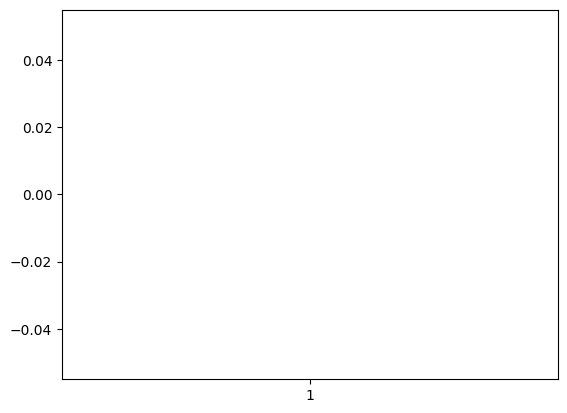

In [82]:
plt.boxplot(df['price'])
plt.show()

# outlier detection in bathroom column

In [83]:
Q1 = df['bathroom'].quantile(0.25)
Q3 = df['bathroom'].quantile(0.75)

In [84]:
IQR=Q3-Q1
IQR

0.0

In [85]:
UW=Q3 +1.5 *IQR
UW

1.0

In [86]:
LW=Q1-1.5*IQR
LW

1.0

In [87]:
l=df['bathroom']<LW
u=df['bathroom']>UW
outlier=((df['bathroom']<LW)|(df['bathroom']>UW))

In [88]:
outlier.sum()

38

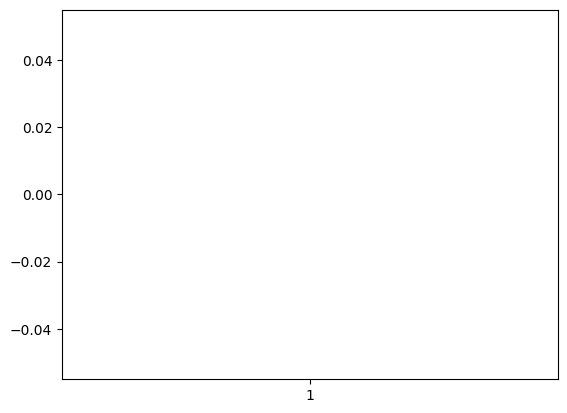

In [89]:
plt.boxplot(df['bathroom'])
plt.show()

# Flooring

In [90]:
lower_bound = df['price'].quantile(0.05)
upper_bound = df['price'].quantile(0.95)

# Replace values below the lower bound with the lower bound value
df['price'] = np.where(df['price'] < lower_bound, lower_bound, df['price'])

# Replace values above the upper bound with the upper bound value
df['price'] = np.where(df['price'] > upper_bound, upper_bound, df['price'])

In [91]:
df

,link,price,title,address,type,rooms,bathroom,parking_spots,utilities,furnished,air_conditioned,allow_pets
0,https://www.kijiji.ca/v-apartments-condos/city...,3023.0,Brand New 3-Bedroom in North York! York Mills...,"1225 York Road, Toronto, ON, M3A 1Y4",Apartment,4.0,2.0,0,No Utilities,False,True,1.0
1,https://www.kijiji.ca/v-apartments-condos/city...,3016.0,Brand New 3-Bdrm. + Den in North York! York M...,"1225 York Road, Toronto, ON, M3A 1Y4",Apartment,5.0,2.0,0,No Utilities,False,True,1.0
2,https://www.kijiji.ca/v-apartments-condos/city...,2199.0,Executive Furnished 1 Bedroom Suites on Avenue...,"320-346 Avenue Road, Toronto, ON, M4V 2H3",Apartment,0.0,1.0,0,"Hydro, Heat, Water",False,True,1.0
3,https://www.kijiji.ca/v-apartments-condos/city...,2295.0,Renovated Jr. 1 @ Yonge and Davisville,"155 Balliol Street, Toronto, ON, M4S 1C2",Apartment,0.0,1.0,0,"Hydro, Heat, Water",False,True,1.0
4,https://www.kijiji.ca/v-apartments-condos/oakv...,2749.0,3 Bedroom Townhome Apartment for Rent - 452-56...,"560 Arlington Boulevard, Burlington, ON, L7N 2S4",Apartment,4.0,1.5,0,No Utilities,False,False,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2248,https://www.kijiji.ca/v-apartments-condos/city...,NaN,NaN,NaN,NaN,NaN,NaN,0,No Utilities,False,False,NaN
2249,https://www.kijiji.ca/v-apartments-condos/miss...,NaN,NaN,NaN,NaN,NaN,NaN,0,No Utilities,False,False,NaN
2250,https://www.kijiji.ca/v-apartments-condos/city...,NaN,NaN,NaN,NaN,NaN,NaN,0,No Utilities,False,False,NaN
2251,https://www.kijiji.ca/v-apartments-condos/city...,NaN,NaN,NaN,NaN,NaN,NaN,0,No Utilities,False,False,NaN


In [92]:
df['rooms'].replace('Bachelor/Studio', '0.5', inplace=True)
df['rooms'].replace('1 + Den', '1.5', inplace=True)


In [93]:
df

,link,price,title,address,type,rooms,bathroom,parking_spots,utilities,furnished,air_conditioned,allow_pets
0,https://www.kijiji.ca/v-apartments-condos/city...,3023.0,Brand New 3-Bedroom in North York! York Mills...,"1225 York Road, Toronto, ON, M3A 1Y4",Apartment,4.0,2.0,0,No Utilities,False,True,1.0
1,https://www.kijiji.ca/v-apartments-condos/city...,3016.0,Brand New 3-Bdrm. + Den in North York! York M...,"1225 York Road, Toronto, ON, M3A 1Y4",Apartment,5.0,2.0,0,No Utilities,False,True,1.0
2,https://www.kijiji.ca/v-apartments-condos/city...,2199.0,Executive Furnished 1 Bedroom Suites on Avenue...,"320-346 Avenue Road, Toronto, ON, M4V 2H3",Apartment,0.0,1.0,0,"Hydro, Heat, Water",False,True,1.0
3,https://www.kijiji.ca/v-apartments-condos/city...,2295.0,Renovated Jr. 1 @ Yonge and Davisville,"155 Balliol Street, Toronto, ON, M4S 1C2",Apartment,0.0,1.0,0,"Hydro, Heat, Water",False,True,1.0
4,https://www.kijiji.ca/v-apartments-condos/oakv...,2749.0,3 Bedroom Townhome Apartment for Rent - 452-56...,"560 Arlington Boulevard, Burlington, ON, L7N 2S4",Apartment,4.0,1.5,0,No Utilities,False,False,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2248,https://www.kijiji.ca/v-apartments-condos/city...,NaN,NaN,NaN,NaN,NaN,NaN,0,No Utilities,False,False,NaN
2249,https://www.kijiji.ca/v-apartments-condos/miss...,NaN,NaN,NaN,NaN,NaN,NaN,0,No Utilities,False,False,NaN
2250,https://www.kijiji.ca/v-apartments-condos/city...,NaN,NaN,NaN,NaN,NaN,NaN,0,No Utilities,False,False,NaN
2251,https://www.kijiji.ca/v-apartments-condos/city...,NaN,NaN,NaN,NaN,NaN,NaN,0,No Utilities,False,False,NaN


# trimming technique

In [94]:
df2=df.copy()

In [95]:

# Define the trimming limits
trim = 0.10

# Calculate the number of rows to be trimmed from the top and bottom of the column
n = int(trim * len(df2))

# Sort the column values in ascending order
sorted_values = df['price'].sort_values()

# Trim the top and bottom rows
trimmed_values = sorted_values.iloc[n:-n]

# Create a new column with the trimmed values
df2['price_trimmed'] = trimmed_values

# log transformation

<AxesSubplot: xlabel='price_log'>

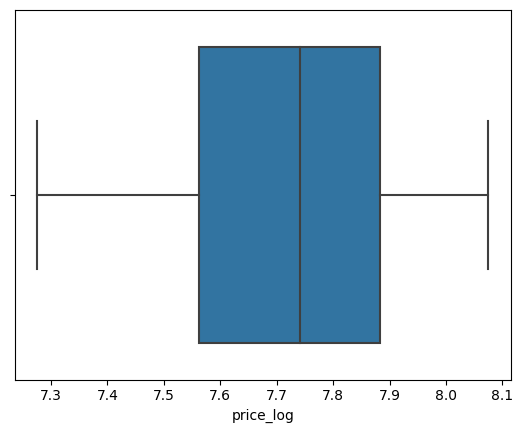

In [96]:
df3=df.copy()
df3['price_log'] = np.log(df3['price'])
sns.boxplot(x='price_log', data=df3)

In [97]:
df4=df.copy()
from sklearn.cluster import KMeans
X = df4[['price','rooms']]

# Initialize the KMeans object with the number of clusters
kmeans = KMeans(n_clusters=3)

# Fit the KMeans model to the data
kmeans.fit(X)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Add the cluster labels to the dataframe
df4['cluster'] = labels



ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
plt.scatter(df4['price'], df4['rooms'], c=df4['cluster'], cmap='viridis')
plt.xlabel('price')
plt.ylabel('rooms')
plt.show()

In [ ]:
# ROC curve for KMeans
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities of each sample belonging to each cluster
probs = kmeans.predict(X)

# Calculate the false positive rate (fpr) and true positive rate (tpr) for each cluster
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(df4['cluster'].values==i, probs==i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each cluster
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label='Cluster {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Plot the random guess line
plt.plot([0, 1], [0, 1], 'k--')

# Set the x and y axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
X = df[['price', 'rooms']]

# Initialize the AgglomerativeClustering object with the number of clusters
agg = AgglomerativeClustering(n_clusters=3)

# Fit the AgglomerativeClustering model to the data
agg.fit(X)

# Get the cluster labels for each data point
labels = agg.labels_

# Add the cluster labels to the dataframe
df4['cluster'] = labels

In [ ]:
# ROC curve for AgglomerativeClustering
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities of each sample belonging to each cluster
probs = agg.fit_predict(X)

# Calculate the false positive rate (fpr) and true positive rate (tpr) for each cluster
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(df4['cluster'].values==i, probs==i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each cluster
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label='Cluster {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Plot the random guess line
plt.plot([0, 1], [0, 1], 'k--')

# Set the x and y axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [317]:
text = df['title'].str.cat(sep=' ')

In [318]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
import string
import nltk
nltk.download('stopwords')
# data cleaning
text = text.lower() # convert to lowercase
text = ''.join(c for c in text if c not in string.digits) # remove digits

# stop word removal
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
tokens = word_tokenize(text)


filtered_tokens = [token for token in tokens if not token in stop_words]

# punctuation removal
filtered_tokens = [token.translate(str.maketrans('', '', string.punctuation)) for token in filtered_tokens]
filtered_tokens = [token for token in filtered_tokens if token]

# stemming
stemmer = SnowballStemmer('english')
stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]

# lemmatization
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

# print the results
print("Original text:", text)
print("Filtered tokens (stop words removed, punctuation removed):", filtered_tokens)
print("Stemmed tokens:", stemmed_tokens)
print("Lemmatized tokens:", lemmatized_tokens)

Original text: brand new -bedroom in north york!  york mills rd. & dvp! brand new -bdrm. + den in north york!  york mills rd. and dvp! executive furnished  bedroom suites on avenue road renovated jr.  @ yonge and davisville  bedroom townhome apartment for rent - - arlington boulev  bedroom suite for rent  bedroom suite for rent  bedroom suite for rent  bedroom suite for rent  bedroom apartments for rent in toronto  bedroom apartments for rent in toronto  bedroom apartments for rent in mississauga most popular  bedroom| newly renovated| call today! % smoke-free  bedroom apt. rental in brampton! -bedroom -  parkway forest drive - don mills & sheppard! upgraded one bedroom apartment at  overland drive - id  -bedroom - laurel grove -  parkway forest dr. spacious two bedroom apartments for rent in north york spacious  bedroom apartments available in north york  bedrooms +  bathrooms -  railroad street  bdrm available at  bloor street, mississauga  bdrm townhouse -  bloor street,  havenwood 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/akhilsurnedi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/akhilsurnedi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/akhilsurnedi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


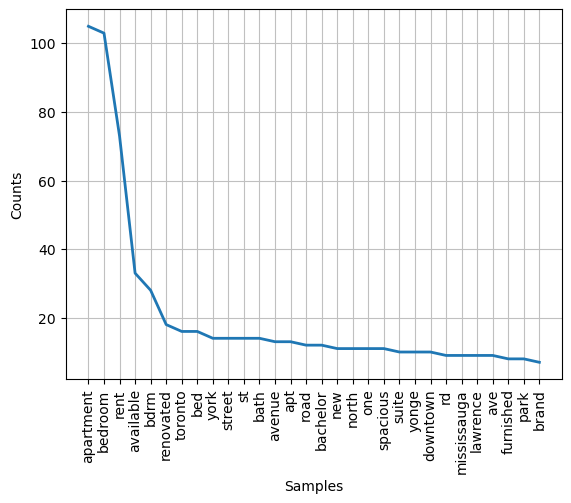

In [319]:
freq_dist = nltk.FreqDist(lemmatized_tokens)

# plot the frequency distribution as a bar chart
freq_dist.plot(30, cumulative=False)


# display the plot
plt.show()